### Abrindo o dataset

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Selecionando apenas as colunas que serão utilizadas
colunas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [3]:
microdadosEnem = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1',usecols=colunas)
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,PA,369.1,780.0,D,E
1,190001004628,PA,416.5,600.0,D,E
2,190001004629,PA,571.5,640.0,H,E
3,190001004630,PA,NaN,NaN,D,D
4,190001004631,PA,NaN,NaN,B,C


### Questões socioeconomicas

#### Q001 - Até que série seu pai, ou o homem responsável por você, estudou?

#### Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

In [4]:
#Dicionário
q001e002Dic = {
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei'
}

In [5]:
#Inserindo Coluna NO_Q001 (Pais)
microdadosEnem['NO_Q001'] = [q001e002Dic[resp] for resp in microdadosEnem.Q001]
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
0,190001004627,PA,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
1,190001004628,PA,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
2,190001004629,PA,571.5,640.0,H,E,Não sei
3,190001004630,PA,NaN,NaN,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...
4,190001004631,PA,NaN,NaN,B,C,Não completou a 4ª série/5º ano do Ensino Fund...


In [6]:
#Inserindo Coluna NO_Q002 (Mães)
microdadosEnem['NO_Q002'] = [q001e002Dic[resp] for resp in microdadosEnem.Q002]
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,190001004627,PA,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,PA,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,PA,571.5,640.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
3,190001004630,PA,NaN,NaN,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
4,190001004631,PA,NaN,NaN,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."


In [7]:
#Escolaridade dos pais. Os dados fazem sentido com a realidade do Brasil
microdadosEnem.filter(items=['NU_INSCRICAO','NO_Q001'])\
.groupby('NO_Q001').count()\
.sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",1308991
Não completou a 4ª série/5º ano do Ensino Fundamental.,1135816
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",723518
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",586620
Não sei,444806
"Completou a Faculdade, mas não completou a Pós-graduação.",375721
Nunca estudou.,290615
Completou a Pós-graduação.,229183


In [8]:
#Escolaridade das mães
microdadosEnem.filter(items=['NU_INSCRICAO','NO_Q002'])\
.groupby('NO_Q002').count()\
.sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",1633692
Não completou a 4ª série/5º ano do Ensino Fundamental.,854826
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",686198
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",667415
"Completou a Faculdade, mas não completou a Pós-graduação.",513711
Completou a Pós-graduação.,399470
Nunca estudou.,194625
Não sei,145333


### Desempenho em matemática em relação à escolaridade dos pais

In [9]:
#Desempenho pela escolaridade dos pais
q001matematica = microdadosEnem.filter(items=['NU_NOTA_MT','Q001'])\
.groupby('Q001').mean()\
.sort_values(by='NU_NOTA_MT', ascending=False)

q001matematica

,NU_NOTA_MT
Q001,
G,624.026605
F,600.192678
E,538.876838
D,515.698499
C,505.344427
H,495.396333
B,486.407778
A,466.053763


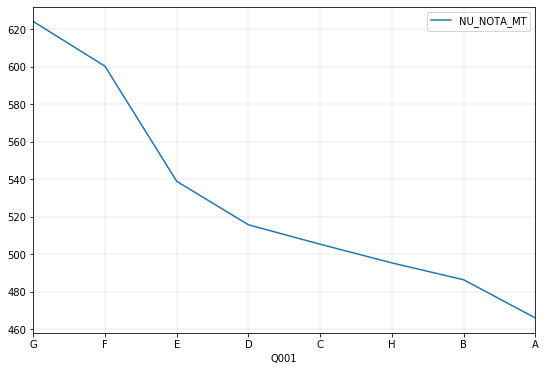

In [10]:
#Gráfico mostra que a média desempenho do candidato em matemática cai de acordo com a escolaridade dos pais
q001matematica.plot(figsize=(9,6))
plt.legend()
plt.grid(True, lw=0.25)
print()

In [11]:
#Desempenho pela escolaridade das mães
q002matematica = microdadosEnem.filter(items=['NU_NOTA_MT','Q002'])\
.groupby('Q002').mean()\
.sort_values(by='NU_NOTA_MT', ascending=False)

q002matematica

,NU_NOTA_MT
Q002,
G,598.862754
F,583.242989
E,528.266458
D,504.996160
C,495.996832
H,484.861471
B,480.021221
A,459.827982


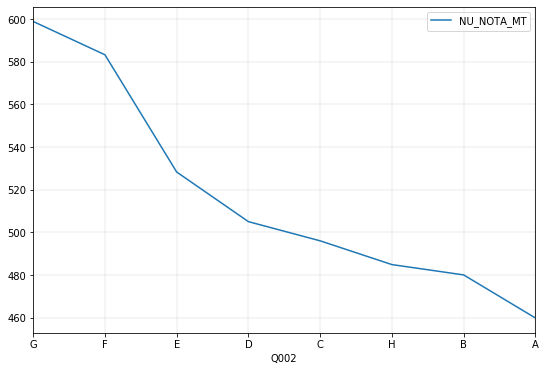

In [12]:
#Gráfico mostra que a média desempenho do candidato em matemática cai de acordo com a escolaridade das mães
q002matematica.plot(figsize=(9,6))
plt.grid(True, lw=0.25)
print()

### Desempenho em redação em relação à escolaridade dos pais

In [13]:
#Desempenho pela escolaridade dos pais
q001redacao = microdadosEnem.filter(items=['NU_NOTA_REDACAO','Q001'])\
.groupby('Q001').mean()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False)

q001redacao

,NU_NOTA_REDACAO
Q001,
G,694.972634
F,667.424584
E,597.312153
D,566.110398
C,549.869448
H,526.842383
B,524.302749
A,486.662873


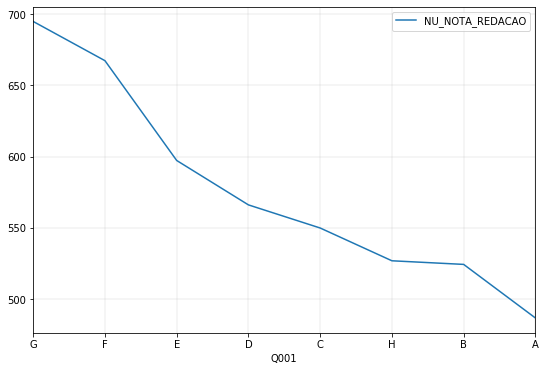

In [14]:
#Gráfico mostra que a média desempenho do candidato em redação cai de acordo com a escolaridade dos pais
q001redacao.plot(figsize=(9,6))
plt.grid(True, lw=0.25)
print()

In [15]:
#Desempenho pela escolaridade das mães
q002redacao = microdadosEnem.filter(items=['NU_NOTA_REDACAO','Q002'])\
.groupby('Q002').mean()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False)

q002redacao

,NU_NOTA_REDACAO
Q002,
G,670.202433
F,649.122242
E,583.298848
D,550.399443
C,535.135982
B,513.507869
H,494.422407
A,472.773686


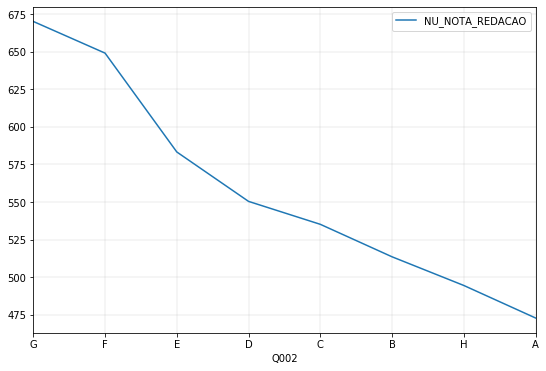

In [16]:
#Gráfico mostra que a média desempenho do candidato em redação cai de acordo com a escolaridade das mães
q002redacao.plot(figsize=(9,6))
plt.grid(True, lw=0.25)
print()

### Questões socioeconômicas por estado

In [17]:
#Candidatos por estado
estado_residencia = microdadosEnem['SG_UF_RESIDENCIA']
estado_residencia.value_counts().head()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
Name: SG_UF_RESIDENCIA, dtype: int64

In [18]:
#Adiciona a coluna SG_UF_RESIDENCIA (que já existe) no dataframe
microdadosEnem['SG_UF_RESIDENCIA'] = microdadosEnem.SG_UF_RESIDENCIA
microdadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,190001004627,PA,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,PA,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,PA,571.5,640.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
3,190001004630,PA,NaN,NaN,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
4,190001004631,PA,NaN,NaN,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."


#### Pausa para alguma análises aleatórias

In [19]:
#Indicadores da escolaridade das mães dos candidatos do Rio de Janeiro que fizeram a Redação
microdadosEnem.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
.where(microdadosEnem.SG_UF_RESIDENCIA == 'RJ')\
.groupby('NO_Q002').mean()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,710.970810
"Completou a Faculdade, mas não completou a Pós-graduação.",683.080979
"Completou o Ensino Médio, mas não completou a Faculdade.",601.129073
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",566.755925
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",548.369602
Não completou a 4ª série/5º ano do Ensino Fundamental.,525.839994
Não sei,521.793651
Nunca estudou.,483.015459


In [20]:
#Indicadores da escolaridade dos pais dos candidatos de São Paulo que fizeram Matemática
microdadosEnem.filter(items=['NU_NOTA_MT','NO_Q001'])\
.where(microdadosEnem.SG_UF_RESIDENCIA == 'SP')\
.groupby('NO_Q001').mean()\
.sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,641.398943
"Completou a Faculdade, mas não completou a Pós-graduação.",616.346981
"Completou o Ensino Médio, mas não completou a Faculdade.",554.992906
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",529.877815
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",520.140807
Não sei,515.169528
Não completou a 4ª série/5º ano do Ensino Fundamental.,502.322768
Nunca estudou.,477.441973


### Retornando aos indicadores

In [21]:
#Indicadores da escolaridade das mães dos candidatos que fizeram Redação de todos os estados
microdadosEnem.filter(items=['NU_NOTA_REDACAO','NO_Q002','SG_UF_RESIDENCIA'])\
.groupby(['SG_UF_RESIDENCIA','NO_Q002']).mean().head()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       515.827815
                 Completou a 8ª série/9º ano do Ensino Fundament...       522.988716
                 Completou a Faculdade, mas não completou a Pós-...       592.186892
                 Completou a Pós-graduação.                               618.692756
                 Completou o Ensino Médio, mas não completou a F...       546.488015

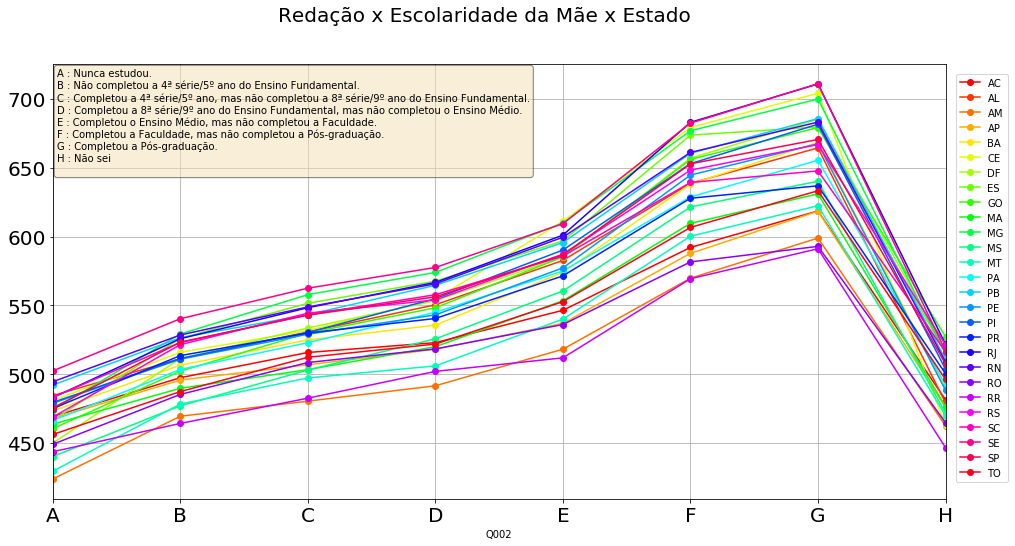

In [22]:
#Tendência mostra que quanto maior a escolaridade da mãe, melhor a nota do candidato em todos os estados (REDAÇÃO)
fig,ax = plt.subplots(figsize=(16,8))
plt.suptitle('Redação x Escolaridade da Mãe x Estado',fontsize=20)

ax = microdadosEnem.filter(items=['NU_NOTA_REDACAO','Q002','SG_UF_RESIDENCIA'])\
.groupby(['Q002','SG_UF_RESIDENCIA'])\
.mean().sort_values(by='NU_NOTA_REDACAO',ascending=False)\
.unstack().plot(ax=ax,fontsize=20, colormap='hsv', grid=True, marker='o' ) #Separa a informação por grupos
                                                                           #aumenta a fonte das palavras e números
                                                                           #muda a cor das linhas
                                                                           #coloca grades no gráfico
                                                                           #marker = marcador

#Modifica as legendas dos estados
handles, labels = ax.get_legend_handles_labels()
import re
edited_labels = [re.search(',\s(.+?)\)',label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1,1), loc=0, borderaxespad= 1)

#Coloca legenda no gráfico (Legendas tiradas do dicionário)
textdictQ002red = ""
for key,value in q001e002Dic.items():
    textdictQ002red = textdictQ002red + "{key} : {value}\n".format(key=key,value=value)
#Formata a legenda no gráfico
ax.text(0.005,0.75, textdictQ002red, transform = ax.transAxes, fontsize = 10, 
        bbox = {'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.5})
print()

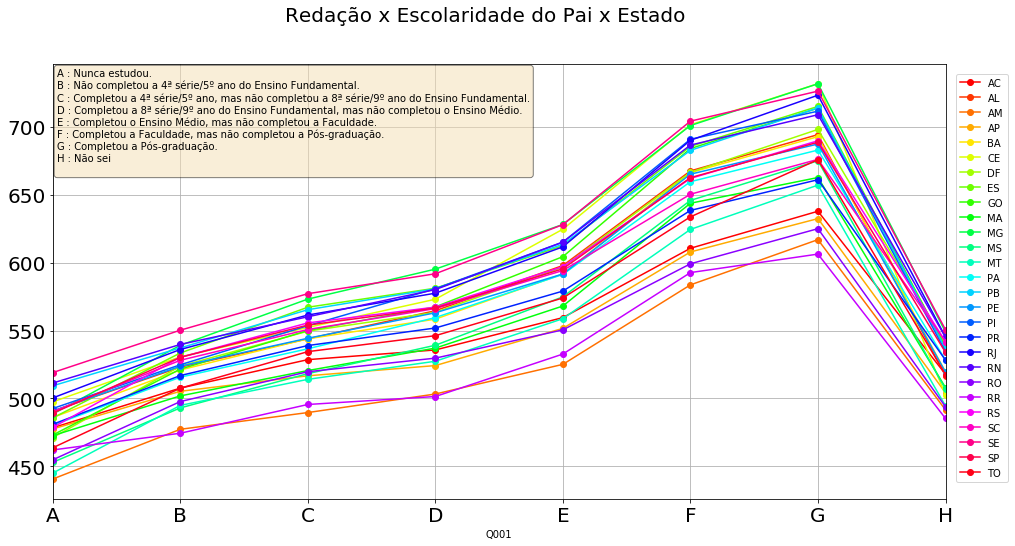

In [23]:
#Tendência mostra que quanto maior a escolaridade do pai, melhor a nota do candidato em todos os estados (REDAÇÃO)
fig,ax = plt.subplots(figsize=(16,8))
plt.suptitle('Redação x Escolaridade do Pai x Estado',fontsize=20)

ax = microdadosEnem.filter(items=['NU_NOTA_REDACAO','Q001','SG_UF_RESIDENCIA'])\
.groupby(['Q001','SG_UF_RESIDENCIA'])\
.mean().sort_values(by='NU_NOTA_REDACAO',ascending=False)\
.unstack().plot(ax=ax,fontsize=20, colormap='hsv', grid=True, marker='o' ) #Separa a informação por grupos
                                                                           #aumenta a fonte das palavras e números
                                                                           #muda a cor das linhas
                                                                           #coloca grades no gráfico
                                                                           #marker = marcador


#Modifica as legendas dos estados
handles, labels = ax.get_legend_handles_labels()
import re
edited_labels = [re.search(',\s(.+?)\)',label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1,1), loc=0, borderaxespad= 1)

#Coloca legenda no gráfico (Legendas tiradas do dicionário)
textdictQ001red = ""
for key,value in q001e002Dic.items():
    textdictQ001red = textdictQ001red + "{key} : {value}\n".format(key=key,value=value)
#Formata a legenda no gráfico
ax.text(0.005,0.75, textdictQ001red, transform = ax.transAxes, fontsize = 10, 
        bbox = {'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.5})
print()

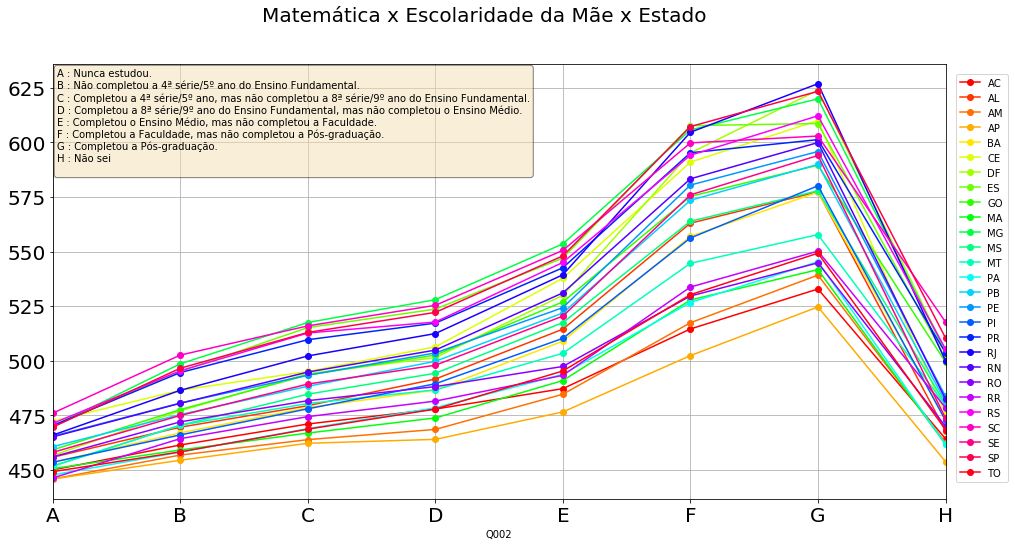

In [24]:
#Tendência mostra que quanto maior a escolaridade da mãe, melhor a nota do candidato em todos os estados (MATEMÁTICA)
fig,ax = plt.subplots(figsize=(16,8))
plt.suptitle('Matemática x Escolaridade da Mãe x Estado', fontsize = 20)


ax = microdadosEnem.filter(items=['NU_NOTA_MT','Q002','SG_UF_RESIDENCIA'])\
.groupby(['Q002','SG_UF_RESIDENCIA'])\
.mean().sort_values(by='NU_NOTA_MT',ascending=False)\
.unstack().plot(ax=ax,fontsize=20, colormap='hsv', grid=True, marker='o' ) #Separa a informação por grupos
                                                                           #aumenta a fonte das palavras e números
                                                                           #muda a cor das linhas
                                                                           #coloca grades no gráfico
                                                                           #marker = marcador
                
#Modifica as legendas dos estados
handles, labels = ax.get_legend_handles_labels()
import re
edited_labels = [re.search(',\s(.+?)\)',label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1,1), loc=0, borderaxespad= 1)

#Coloca legenda no gráfico (Legendas tiradas do dicionário)
textdictQ001red = ""
for key,value in q001e002Dic.items():
    textdictQ001red = textdictQ001red + "{key} : {value}\n".format(key=key,value=value)
#Formata a legenda no gráfico
ax.text(0.005,0.75, textdictQ001red, transform = ax.transAxes, fontsize = 10, 
        bbox = {'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.5})
print()                

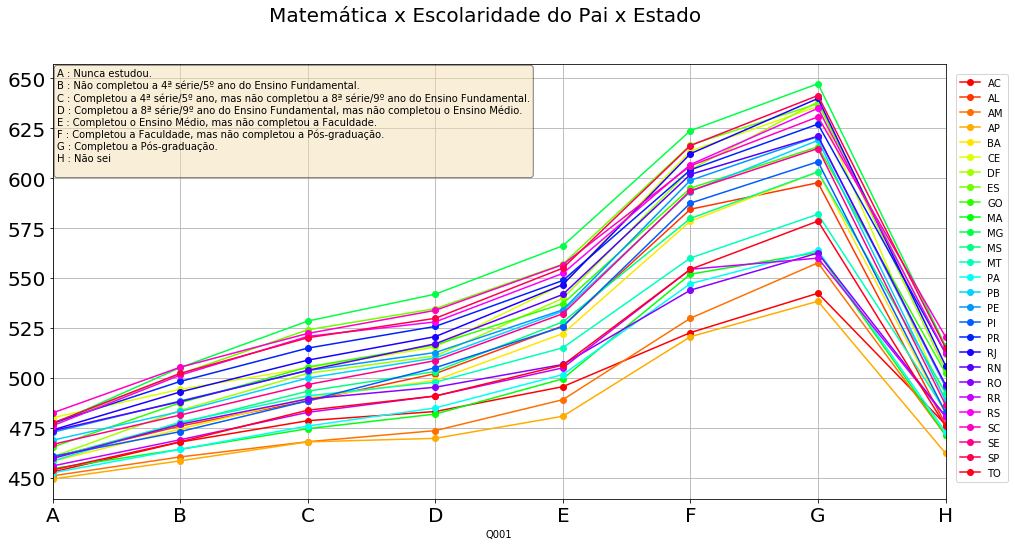

In [25]:
#Tendência mostra que quanto maior a escolaridade do pai, melhor a nota do candidato em todos os estados (MATEMÁTICA)
fig,ax = plt.subplots(figsize=(16,8))
plt.suptitle('Matemática x Escolaridade do Pai x Estado', fontsize=20)

ax = microdadosEnem.filter(items=['NU_NOTA_MT','Q001','SG_UF_RESIDENCIA'])\
.groupby(['Q001','SG_UF_RESIDENCIA'])\
.mean().sort_values(by='NU_NOTA_MT',ascending=False)\
.unstack().plot(ax=ax,fontsize=20, colormap='hsv', grid=True, marker='o' ) #Separa a informação por grupos
                                                                           #aumenta a fonte das palavras e números
                                                                           #muda a cor das linhas
                                                                           #coloca grades no gráfico
                                                                           #marker = marcador
                
#Modifica as legendas dos estados
handles, labels = ax.get_legend_handles_labels()
import re
edited_labels = [re.search(',\s(.+?)\)',label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1,1), loc=0, borderaxespad= 1)

#Coloca legenda no gráfico (Legendas tiradas do dicionário)
textdictQ001red = ""
for key,value in q001e002Dic.items():
    textdictQ001red = textdictQ001red + "{key} : {value}\n".format(key=key,value=value)
#Formata a legenda no gráfico
ax.text(0.005,0.75, textdictQ001red, transform = ax.transAxes, fontsize = 10, 
        bbox = {'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.5})
print()             